In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [38]:
uy = [0,1,2,3,4,5,6,7]
k1 = 20
k2 = 10
u3 = [0,1,3,6,0,1,3,6]
k3 = [[0,k1,k1,k1,0,0,0,0],[k1,0,k1,k1,0,0,0,0],[k1,k1,0,k1,0,0,0,0],[k1,k1,k1,0,0,0,0,0],
      [0,0,0,0,0,k2,k2,k2],[0,0,0,0,k2,0,k2,k2],[0,0,0,0,k2,k2,0,k2],[0,0,0,0,k2,k2,k2,0]]

In [39]:
def sol1(u,k):
    final = []
    for i in uy:
        add = []
        value = 0
        for j in uy:
            q = abs(j-i)
            if j-i == 1 or i-j == 1:
                value = 0.5*(k[i][j])*abs(u[j]-u[i])**2.0
                add.append(value)
            elif j-i == 0 :
                add.append(0)
            elif j - i > 1.0:
                if k[i][j] == 0:
                    add.append(0)
                elif k[i][j] != 0:
                    t = 0
                    x = j-1
                    y = j
                    while y > 0:
                        if k[i][y] == 0:
                            y = y - 1
                        pe = ((k[i][y])*(u[y] - u[x])**2.0)/2
                        t = t + pe
                        y = y - 1
                        x = x - 1
                    add.append(t)
                    t = 0
            elif j - i < -1:
                if k[i][j] == 0:
                     add.append(0)
                elif k[i][j] != 0:
                    t = 0
                    y = j
                    x = i 
                    jin = j + 1
                    while y < i:
                        pe = ((k[i][j])*(u[j] - u[jin])**2.0)/2
                        t = t + pe
                        j += 1
                        jin += 1
                        y += 1
                    add.append(t)
                    t = 0
        final.append(add)
    return final 

In [40]:
sol1(u3,k3)

[[0, 10.0, 50.0, 140.0, 0, 0, 0, 0],
 [10.0, 0, 40.0, 130.0, 0, 0, 0, 0],
 [50.0, 40.0, 0, 90.0, 0, 0, 0, 0],
 [140.0, 130.0, 90.0, 0, 0.0, 0, 0, 0],
 [0, 0, 0, 0.0, 0, 5.0, 25.0, 70.0],
 [0, 0, 0, 0, 5.0, 0, 20.0, 65.0],
 [0, 0, 0, 0, 25.0, 20.0, 0, 45.0],
 [0, 0, 0, 0, 70.0, 65.0, 45.0, 0]]

In [41]:
a = np.array([0, 10.0, 50.0, 140.0, 0, 0, 0, 0])
b = np.array([10.0, 0, 40.0, 130.0, 0, 0, 0, 0])
c = np.array([50.0, 40.0, 0, 90.0, 0, 0, 0, 0]),
d = np.array([140.0, 130.0, 90.0, 0, 0.0, 0, 0, 0])
e = np.array([0, 0, 0, 0.0, 0, 5.0, 16.25, 61.25])
f = np.array([0, 0, 0, 0, 5.0, 0, 11.25, 56.25])
g = np.array([0, 0, 0, 0, 16.25, 11.25, 0, 45.0])
h = np.array([0, 0, 0, 0, 61.25, 56.25, 45.0, 0])
a+b+c+d+e+f+g+h

array([[ 200. ,  180. ,  180. ,  360. ,   82.5,   72.5,   72.5,  162.5]])

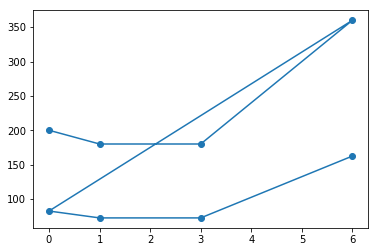

In [44]:
ans = np.array([ 200. ,  180. ,  180. ,  360. ,   82.5,   72.5,   72.5,  162.5])
pos = [0,1,3,6,0,1,3,6]
plt.scatter(pos,ans)
plt.plot(pos,ans)